# Statistics

## 1.1 Sales for the past week were the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [11]:
# not suing bessel's correction, since this is not a sample

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean(x):
    return sum(x) / len(x)

def variance(x):
    mean_x = mean(x)
    return sum(map(lambda _: (_ - mean_x) ** 2, x)) / len(x)

def std_dev(x):
    return variance(x) ** (1/2)

print('mean', mean(sales), 'variance', variance(sales), 'std_dev', std_dev(sales))

mean 3052.714285714286 variance 183761.06122448976 std_dev 428.67360686714756


In [8]:
sum(map(lambda x:x**2, sales))

66519779

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [14]:
import pandas as pd

customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({'sales':sales,'customers':customers})

In [21]:
df.sales.var(ddof=0)

183761.06122448976

In [25]:
# This method only computes sample covariance (See the docs)
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [40]:
# incorrect, because our std are POPULATION parameters, not sample statistics
df.cov().loc['sales', 'customers'] / (std_dev(sales) * std_dev(customers))

1.123306307450706

In [41]:
# this computes the POPULATION correlation, even though ddof=1. 
# Bessels' correction cancels out with a factor in the numerator.
df.cov().loc['sales', 'customers'] / (df.sales.std(ddof=1) * df.customers.std(ddof=1))

0.9628339778148909

In [42]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [31]:
df.cov?

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/'
                 'Cleaning-Titanic-Data/master/titanic_clean.csv')

In [45]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [46]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

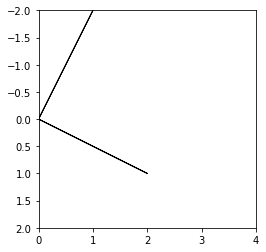

In [57]:
import matplotlib.pyplot as plt

plt.axes().set_aspect('equal')
plt.arrow(0,0,2,1)
plt.arrow(0,0,1,-2);
plt.xlim(0,4)       
plt.ylim(2,-2);

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [61]:
import numpy as np

a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a,b)

-40

No, the dot product is not 0.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [62]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c) ** 2)

print(np.dot(c, c))

print(np.matmul(np.transpose(c), c))

665.0
665
665


# 🤯

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\hat{i} + 12\hat{j}
\qquad
e = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

But also . . .

In [87]:
v = np.array([7, 12])
np.sqrt((np.sum(v**2)))

13.892443989449804

In [86]:
v = np.array([2, 11, -8])
np.sqrt((np.sum(v**2)))

13.74772708486752

In [85]:
7/(7**2 + 12**2)**(1/2)

0.5038710255240862

In [94]:
np.linalg.norm(np.array([0.14, 0.79, -0.58]))

0.99

\begin{align}
d = 13.9 \begin{bmatrix} 0.50 \\ 0.86 \end{bmatrix}
\qquad
e = 13.7 \begin{bmatrix} 0.14 \\ 0.79 \\ -0.58  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [95]:
v = np.array([4, 12, 11, 9, 2])
v / np.sqrt((np.sum(v**2)))

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

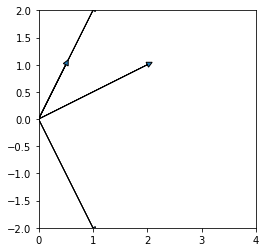

In [99]:
plt.axes().set_aspect('equal')
plt.arrow(0,0,2,1,head_width=.1, head_length=0.1)
plt.arrow(0,0,1,-2,head_width=.1, head_length=0.1)
plt.arrow(0,0,1,2,head_width=.1, head_length=0.1)
plt.arrow(0,0,0.5,1,head_width=.1, head_length=0.1)
plt.xlim(0,4)       
plt.ylim(-2,2);

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

R, they are on the same line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



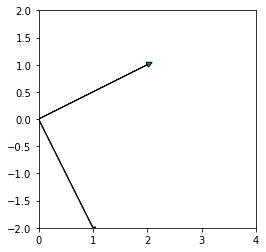

In [101]:
plt.axes().set_aspect('equal')
plt.arrow(0,0,2,1,head_width=.1, head_length=0.1)
plt.arrow(0,0,1,-2,head_width=.1, head_length=0.1)
plt.xlim(0,4)
plt.ylim(-2,2);

## 6.2 What does it mean to form a basis?

The basis is formed by linear independent vectors that can be scaled and combined to fill a vector space $V$

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

```
[ 1, 2, 3]
[-1, 0, 7]
[ 4, 8, 2] / 4

[ 1, 2, 3  ] -v3
[-1, 0, 7  ]
[ 0, 2,  .5]

[ 1, 0, 2.5]
[-1, 0, 7  ] +v1
[ 0, 2,  .5] / 2

[ 1, 0, 2.5 ]
[ 0, 0, 9.5 ] / 9.5
[ 0, 1,  .25]

[ 1, 0, 2.5 ] -2.5  * v3
[ 0, 1,  .25] - .25 * v3
[ 0, 0, 1   ]

[ 1, 0, 0]
[ 0, 1, 0]
[ 0, 0, 1]
```

R^3

## 7.2 What does the rank of a matrix tell us?

The number of effective dimensions the matrix reduces to.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

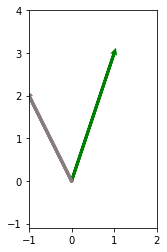

In [116]:
w = np.array([-1, 2])
v = np.array([ 1, 3])
proj = np.multiply(np.multiply(w, v) / np.multiply(v, v), v)

plt.axes().set_aspect('equal')

plt.arrow(0, 0, *v, linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, *w, linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, *proj, linewidth=3, head_width=.05, head_length=0.05, color ='gray')

plt.xlim(-1,2)          
plt.ylim(-1,4)
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

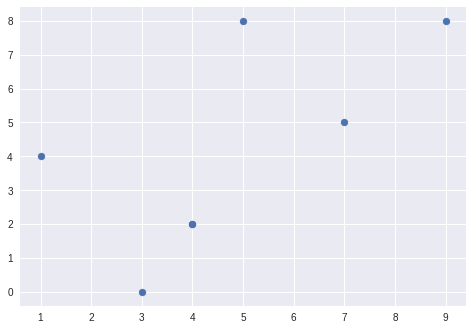

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()